# Project: Investigating the TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

  In this analysis I would be investigating a movie dataset. The data set contains information about a little over 10,000 movies collected from [The Movie Database (TMDb)](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata), it also includes features such as casts, genre, user ratings, budget and revenue. The last two columns 'budget_adj' and 'revenue_adj' of the associated movies is in terms of the dollars rate in year 2010, while accounting for inflation.
  
 This project would be answering questions as regards movies popularity, such as; 
1. Do Directors' choice affect  the popularity of movies?
2. Is there a relationship between the year of release and the popularity of movies?
3. What genre of movies got popular over the years?
4. How did people rate the popular movies?

To begin analysis, the necessary packages would be installed in the next cell.

In [1]:
# installing packages for analysis
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

> In this section, I would pass the dataset (a csv file) through Pandas. This would make it easy for me to do my analysis (as it becomes a dataframe), if  errors are found in the data set they'd be handled in this section.

The cell below reads the csv file using pandas and returns the first five rows of the dataset. This is just to have an overview of the data.

In [11]:
# using pandas to read csv file
df = pd.read_csv('tmdb-movies.csv')
# returns the first 5 rows of the dataset to have an overview 
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The next cell tells us how many rows and columns are in the dataset

In [12]:
# this displays the number of rows and columns
df.shape

(10866, 21)

The previous cell tells us that the data set has 10,866 rows and 21 columns. The columns are:
1. id
2. imdb_id
3. popularity
4. budget
5. revenue
6. original_title 
7. cast 
8. homepage 
9. director 
10. tagline
11. keywords
12. overview
13. runtime 
14. genres 
15. production_companies
16. release_date 
17. vote_count
18. vote_average 
19. release_year 
20. budget_adj
21. revenue_adj

It is important to do a quick summary as it points us to what might be wrong in the data.

In [13]:
# quick statistic summary of the data set
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the cell above, the count value gives us an idea of how many values are present in each column, and statistics like mean, standard deviation, minimum and maximum values amongst others are displayed.
We can also see that the 'budget', 'revenue', 'budget_adj', 'revenue_adj' columns all have their min, first quartile and second quartile to be zeros, this would affect the analysis, if not properly handled.

It is also important to get information like data types, to see if there's an error in any column's data type and also to determine if there are Null values present in the dataset. That is what the code in the next cell aims to achieve.

In [14]:
#quick information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The data types appears to be alright, but there are Null values present. The next cell tells us how many there are in each column.

In [15]:
# returns the rows with missing values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Also, are there duplicated rows in this data? Let's find out.

In [16]:
df.duplicated().sum()

1

Yes, there is a duplicated row.

Our dataset appears to have missing or null values, zero values, a duplicated row, as well as unneccessary columns. These would be handled in the data cleaning section.

### Data Cleaning

> In this section, the issues highlighted in the data will be resolved.

First, the columns that are not relevant to answering the questions are dropped.

In [17]:
# returns a new dataframe with the irrelevant columns dropped
df = df.drop(columns=['imdb_id','budget','revenue','homepage','tagline','keywords','overview','runtime','release_date','vote_count','budget_adj','revenue_adj'])
df.head()

,id,popularity,original_title,cast,director,genres,production_companies,vote_average,release_year
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015


We can see from the first five rows that these columns are now dropped, let's do a quick summary statistic on the new data set.

In [18]:
df.describe()

,id,popularity,vote_average,release_year
count,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,5.974922,2001.322658
std,92130.136561,1.000185,0.935142,12.812941
min,5.000000,0.000065,1.500000,1960.000000
25%,10596.250000,0.207583,5.400000,1995.000000
50%,20669.000000,0.383856,6.000000,2006.000000
75%,75610.000000,0.713817,6.600000,2011.000000
max,417859.000000,32.985763,9.200000,2015.000000


Zero values are no longer present, after dropping those columns. Let's do a check on Null Values.

In [19]:
# returns null values 
df.isna().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
genres                    23
production_companies    1030
vote_average               0
release_year               0
dtype: int64

There appear to be some Null values, so I'd drop all null values. This might be an ideal way to handle missing values, but for this report, the number of the  Null values in the cast, director and genres columns are very small compared to the entire dataset. Also, the production company column is not answering any of this reports questions. 

In [20]:
# drop null values
df.dropna(subset = ['cast', 'director', 'genres', 'production_companies'], how='any', inplace=True)

Missing values are dropped and inplace set to True, so that the changes saves in the data.

In [21]:
#drops duplicates
df.drop_duplicates()

,id,popularity,original_title,cast,director,genres,production_companies,vote_average,release_year
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015
...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,Documentary,Bruce Brown Films,7.4,1966
10862,20379,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,5.7,1966
10863,39768,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,Mystery|Comedy,Mosfilm,6.5,1966
10864,21449,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,Action|Comedy,Benedict Pictures Corp.,5.4,1966


The duplicated row is dropped now. Let's do another statistical summary.

In [22]:
df.describe()

,id,popularity,vote_average,release_year
count,9773.000000,9773.000000,9773.000000,9773.000000
mean,63187.492479,0.694711,5.963430,2000.879362
std,90713.666750,1.036879,0.913179,13.036453
min,5.000000,0.000188,1.500000,1960.000000
25%,10222.000000,0.232756,5.400000,1994.000000
50%,18681.000000,0.419765,6.000000,2005.000000
75%,70577.000000,0.776380,6.600000,2011.000000
max,417859.000000,32.985763,8.700000,2015.000000


The dataset now has no null values, zero values, duplicates or columns not necessary to  our analysis. 
Now we can proceed to answering our questions with the aid of visuals.

<a id='eda'></a>
## Exploratory Data Analysis

> In this section all the questions posed will be answered with proper visualization.



First, let's explore the relationship between all variables using the heatmap plot.

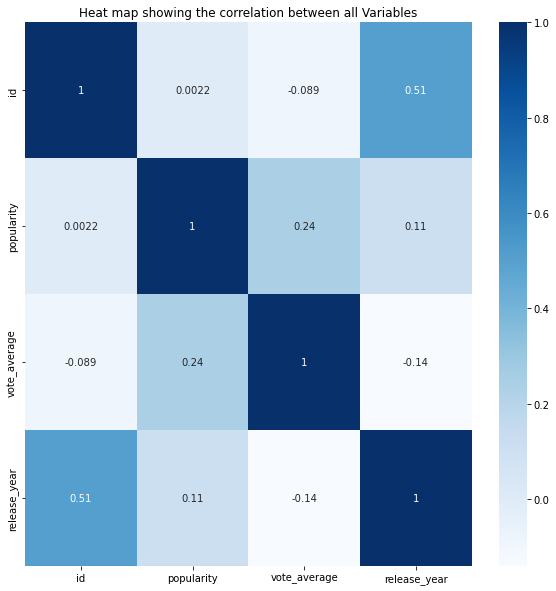

In [23]:
#seaborn plot of the heatmap set to colour blue
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')
plt.title('Heat map showing the correlation between all Variables');

From these we can see the two kinds of correlation between variables on display.

Positive correlation are as follows:
1. Popularity - Vote Average and Release year
2. Vote Average - Popularity
3. Release year - Popularity
    
And Negative correlation:
1. Release year - Vote Average

### 1. Do Director choice affect  the popularity of movies?

Lets get the top 20 most popular movies from 1960 to 2015.

In [24]:
#returns the top 20 viral movies of the data set
top_20=df.nlargest(n=20, columns=['popularity'])
top_20

,id,popularity,original_title,cast,director,genres,production_companies,vote_average,release_year
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
629,157336,24.949134,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,8.0,2014
630,118340,14.311205,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7.9,2014
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
631,100402,12.971027,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,Action|Adventure|Science Fiction,Marvel Studios,7.6,2014
1329,11,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,7.9,1977
632,245891,11.422751,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,7.0,2014
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
633,131631,10.739009,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,Science Fiction|Adventure|Thriller,Lionsgate|Color Force,6.6,2014


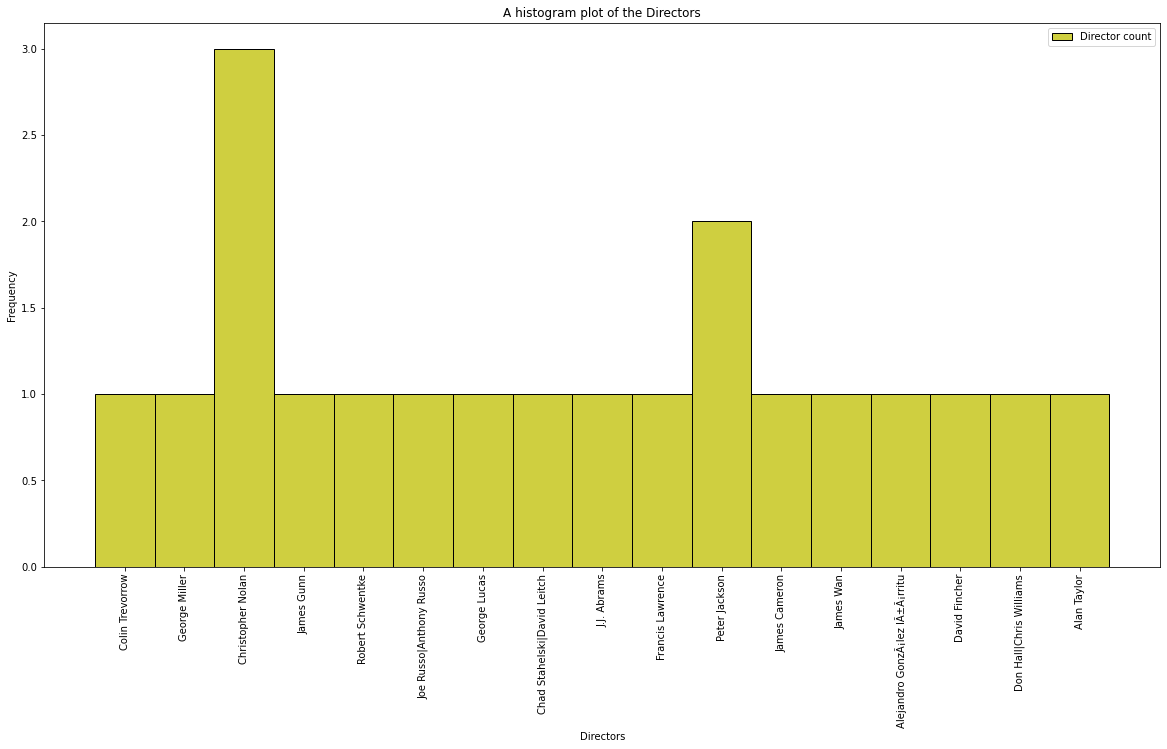

In [25]:
# returns the count of directors in the top 20 popular movies
plt.figure(figsize=(20,10))
plt.title('A histogram plot of the Directors')
plt.xlabel('Directors')
plt.ylabel('Frequency')
sns.histplot(top_20.director, color='y', label='Director count')
plt.xticks(rotation=90)
plt.legend();

Chriatopher Nolan and Peter Jackson have three and two movies respectively movies in the top 20 movies of all time, the highest in relation to other directors.

### 2. Is there a relationship between the year of release and the popularity of movies?

I would be conducting a few scatter plots,therefore I would define a 'draw_scatter_plot' function below, this is done to save time and avoid code repetition.

In [51]:
def draw_scatter_plot(df,x,y,l,title,xlabel,ylabel):
    "This returns a scatter plot"
    plt.figure(figsize=(10,10))
    plt.scatter(x=x,y=y,data=df, label=l)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='best')
    return;

Now I'd proceed to do a scatter plot of the movie release year against their popularity score.

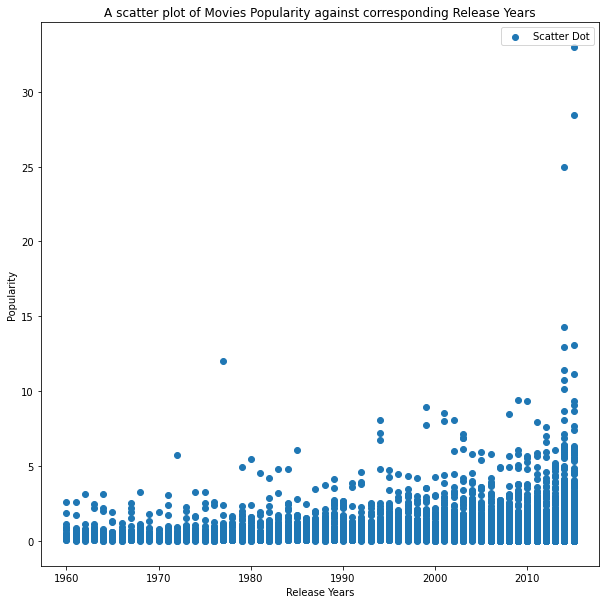

In [49]:
draw_scatter_plot(df,'release_year','popularity','Scatter Dot','A scatter plot of Movies Popularity against corresponding Release Years','Release Years','Popularity')

In [27]:
# returns the unique years present in the dataset
df.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

From the scatter plot we can see that movies released got popular as the years increased (Positive Correlation),the most popular movies were released in the 2000s. And the peak appears to be in the most recent year which is 2015(the upper limit). Let's explore the data further by plotting the top 20 most popular movies against their release year.

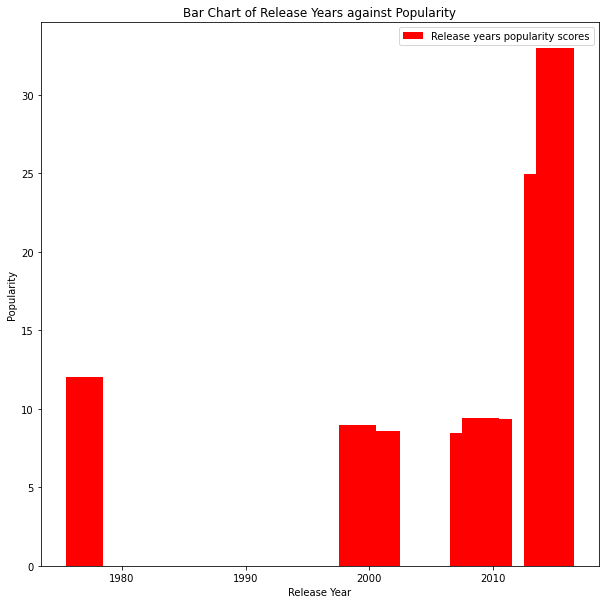

In [28]:
plt.figure(figsize=(10,10))
plt.title('Bar Chart of Release Years against Popularity')
plt.bar(x='release_year',height='popularity',width=3,data=top_20, color='r', label='Release years popularity scores')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.legend();

From the plot we can see that the most popular movies still are released in the 2000s. Could it be as a result of the genres of the movies released in the 2000s?

### 3. What genre of movies got popular over the years?

Lets visualize the genres of the most popular movies.

In [29]:
#returns the unique genres of the most popular movies
top_20.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Drama|Science Fiction',
       'Action|Science Fiction|Adventure',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction',
       'Adventure|Action|Science Fiction', 'Action|Thriller',
       'Action|Adventure|Science Fiction|Fantasy',
       'Science Fiction|Adventure|Thriller', 'Adventure|Fantasy',
       'Action|Adventure|Fantasy|Science Fiction',
       'Action|Thriller|Science Fiction|Mystery|Adventure',
       'Action|Crime|Thriller', 'Western|Drama|Adventure|Thriller',
       'Drama', 'Adventure|Family|Animation|Action|Comedy',
       'Science Fiction|Action|Thriller|Adventure',
       'Adventure|Fantasy|Action', 'Drama|Action|Crime|Thriller'],
      dtype=object)

To plot the frequency of these genres in the top 20 popular movies, we have to do a split of the genres column. There's a common seperator "|", therefore I'd do a split by it.

In [30]:
genres1 = top_20.copy()
genres2 = top_20.copy()
genres3 = top_20.copy()
genres4 = top_20.copy()

In [31]:
# columns to split by "|"
split_columns = ['genres']

# applying string split function to each column of each dataframe copy
for c in split_columns:
    genres1[c] = genres1[c].str.split('|').str[0]
    genres2[c] = genres2[c].str.split('|').str[1]
    genres3[c] = genres3[c].str.split('|').str[2]
    genres4[c] = genres4[c].str.split('|').str[3]

In [32]:
#combine each of the new dataframes into one
new_genre_df = pd.concat([genres1, genres2, genres3, genres4], ignore_index=True)
new_genre_df

,id,popularity,original_title,cast,director,genres,production_companies,vote_average,release_year
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,157336,24.949134,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Adventure,Paramount Pictures|Legendary Pictures|Warner B...,8.0,2014
3,118340,14.311205,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,Action,Marvel Studios|Moving Picture Company (MPC)|Bu...,7.9,2014
4,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
...,...,...,...,...,...,...,...,...,...
75,550,8.947905,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,NaN,Regency Enterprises|Fox 2000 Pictures|Taurus F...,8.1,1999
76,177572,8.691294,Big Hero 6,Scott Adsit|Ryan Potter|Daniel Henney|T.J. Mil...,Don Hall|Chris Williams,Action,Walt Disney Pictures|Walt Disney Animation Stu...,7.8,2014
77,87101,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Adventure,Paramount Pictures|Skydance Productions,5.8,2015
78,120,8.575419,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,NaN,WingNut Films|New Line Cinema|The Saul Zaentz ...,7.8,2001


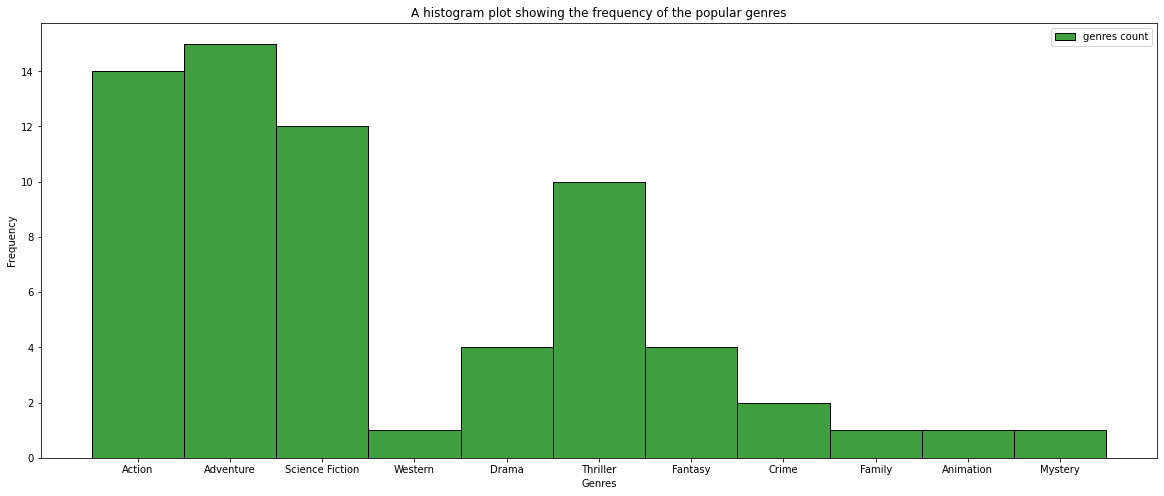

In [33]:
#histogram plot of the genre frequncy
plt.figure(figsize=(20,8))
sns.histplot(new_genre_df.genres,bins=20, color='g', label='genres count')
plt.title('A histogram plot showing the frequency of the popular genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.legend();

The most popular genres as we moved towards the 2000s were Action, Adventure, Science Fiction, and/or Thriller.

### 4. How did people rate the popular movies?

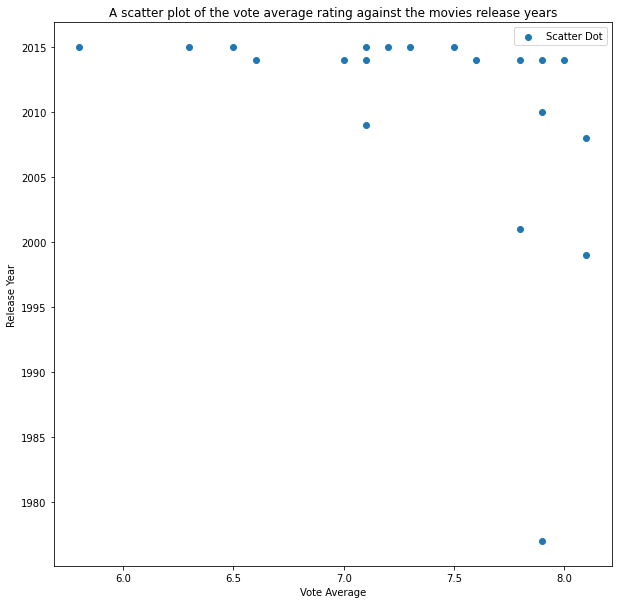

In [52]:
# a scatter plot of the vote average rating against the release years of the movies
draw_scatter_plot(top_20,'vote_average','release_year','Scatter Dot','A scatter plot of the vote average rating against the movies release years','Vote Average','Release Year')

The vote average of movies increased with decrease in years. That's a negative correlation,and a little shocking seeing that movies got more popular over the years.

<a id='conclusions'></a>
## Conclusions

From the analysis concluded I'd say ;

1. There is a positive correlation between the director choice and the popularity of movies. Therefore I'd advice that if you want your movie to go viral, you hire Christopher Nolan to direct it.
2. There is also a positive relationship between the release years and the popularity of the movies, but the real reason was not explored in this report.
3. The most popular movies appeared in the 2000s and they had quite a good number of genres in common, the genre definitely affects the popularity of a movie. General viewers tend to have high interest in Action, Adventure, Science Fiction, and/or Thriller.
4. Although, the movies got popular/viral as the year increased, it is also interesting to note that the highest viewers ratings came from earlier years.

### Limitations
1. General viewers tend to have high interest in Action, Adventure, Science Fiction, and/or Thriller as stated earlier, but this might not be entirely factual as I didn't explore a larger sample size other than the top 20 popular movies.
2. This dataset does not account for factors like nostalgia and I didn't explore the 'vote_count' column, therefore it would be difficult to ascertain why although movies got popular as the years increased the best viewer's rating came from earlier years.
3. I can not conclude totally that the director choice and release years are what make a movie go viral, as I did not analyse important features like cast and/or budget which would have an impact on a movies popularity.

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigating_the_TMDb_Movie_Dataset.ipynb'])

1